#### Sources:   - 'Monetary Authority of Singapore'
#### License: 'https://data.gov.sg/open-data-licence'
#### Frequency: 'Annual'
#### Coverage: '1989-01-01 to 2015-08-31'
#### Last Updated: '2017-04-19T15:28:11.803109'

In [1]:
from io import StringIO
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'}

In [2]:
url='https://storage.data.gov.sg/credit-and-charge-card-statistics/resources/credit-and-charge-card-statistics-annual-2016-02-11T10-33-16Z.csv'
s=requests.get(url, headers= headers).text

In [3]:
df_credit_card_info=pd.read_csv(StringIO(s), sep=",")

In [4]:
df_billings_balance=df_credit_card_info[['total_billings','rollover_balance']]

#### Present a Chart (Plot) of Rollover_Balance and Total_Billing

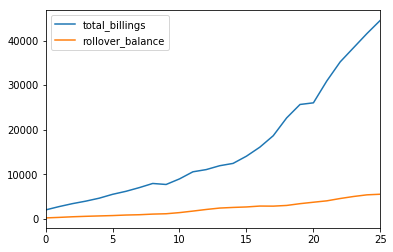

In [5]:
df_billings_balance.plot(kind="line")

##### Compute Linear Regresssion where :
x is the Independent Variable (the Total Billings)
y is the Dependent Variable (the Rollover Balance)


In [6]:
x=df_billings_balance[['total_billings']]
y=df_billings_balance[['rollover_balance']]
lm=LinearRegression()
lm.fit(x,y)
Yhat=lm.predict(x)
print("The computed intercept is :", lm.intercept_)
print("The computed slope is : ", lm.coef_)
print("The R-Square is :", lm.score(x,y))

The computed intercept is : [270.93405918]
The computed slope is :  [[0.12501937]]
The R-Square is : 0.9604898609964686


##### So we have : Rollover_Balance = 270.93406 + (0.12502)*Total_Billings 
##### The R-Square (R-Squared) value indicates that a very high degree of variation in Rollover Balances is explained by variation in Total Billings

##### Let's create a Regression Plot 
###### the "." (dots) are actual Rollover_Balance values
###### the line is the forecasted values

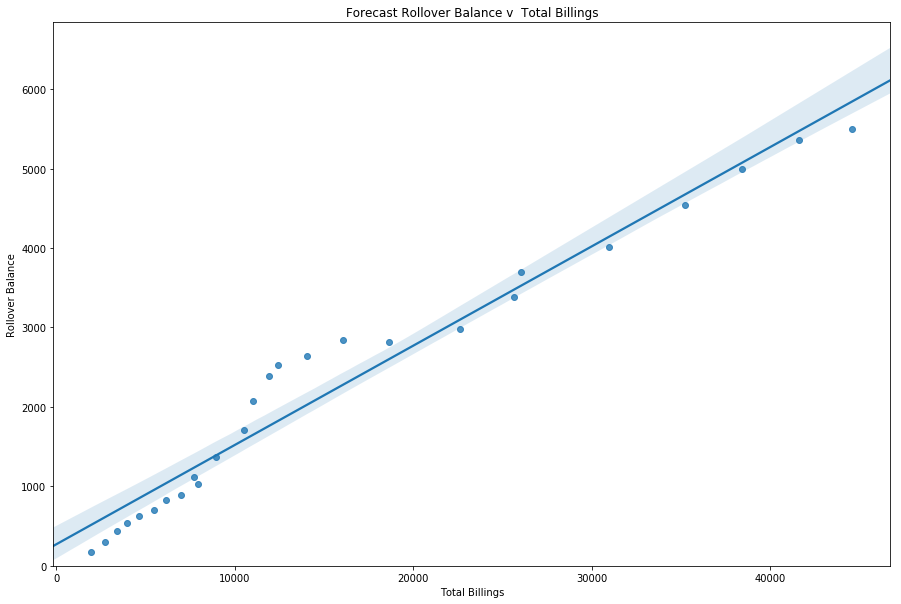

In [7]:
width=15
height=10
plt.figure(figsize=(width,height))
sns.regplot(x='total_billings',y='rollover_balance',data=df_billings_balance)
plt.title('Forecast Rollover Balance v  Total Billings')
plt.xlabel('Total Billings')
plt.ylabel('Rollover Balance')
plt.ylim(0,)
plt.show()